<a href="https://colab.research.google.com/github/avilaJorge/CSE253_FinalProject/blob/master/DeepFakeDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#connect").click()
}
setInterval(ConnectButton,60000);
"""

'\nfunction ConnectButton(){\n    console.log("Connect pushed"); \n    document.querySelector("#connect").click()\n}\nsetInterval(ConnectButton,60000);\n'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp -r /content/drive/'My Drive'/CSE253/CSE253_FinalProject/* .

In [4]:
import gdown
gdown.download("https://drive.google.com/uc?id=13M66USmHONEN2RVjSJjajRmUiao1_Z5N", "./StyleGAN_images.zip", quiet=False)
!mkdir StyleGAN_images
!unzip StyleGAN_images.zip -d ./StyleGAN_images
!rm StyleGAN_images.zip
!ls 

Downloading...
From: https://drive.google.com/uc?id=13M66USmHONEN2RVjSJjajRmUiao1_Z5N
To: /content/StyleGAN_images.zip
609MB [00:05, 114MB/s]


mkdir: cannot create directory ‘StyleGAN_images’: File exists
Archive:  StyleGAN_images.zip
replace ./StyleGAN_images/lsun_bedrooms/000038527b455eaccd15e623f2e229ecdbceba2b.webp? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
dataset_downloader.ipynb	   drive		README.md
DeepFake_Dataloader.py		   Logistic_Regression	sample_data
DeepFakeDetectionModel.ipynb	   LSUN			StyleGAN_images
DeepFakeDetectionModel_LSUN.ipynb  LSUN_Dataloader.py	train.py
DeepFakeDetectionModel_old.ipynb   models.py		utils.py
DFD_PreProcessor.ipynb		   __pycache__


In [5]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Mar 13 11:08:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%run LSUN_Dataloader.py
%run utils.py

In [7]:
# imports pytorch
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# Numpy, Matplotlib, and PIL
import numpy as np
import matplotlib.pyplot as plt

# K-means import
!pip install pykeops
from pykeops.torch import LazyTensor
!pip install kmeans-pytorch
from kmeans_pytorch import kmeans

# general imports
import pprint

# My imports
from LSUN_Dataloader import get_dataloaders
from models import LinearRegression, save_model, SVM, KMeans
from utils import RunningAverage
from train import train, evaluate

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
trn_dl, val_dl, tst_dl = get_dataloaders(classes=['cats'])

('Classes: '
 "['lsun_bedrooms', "
 "'lsun_cars', "
 "'lsun_cats', "
 "'stylegan_bedrooms', "
 "'stylegan_cars', "
 "'stylegan_cats']")
('Indices: '
 "{'lsun_bedrooms': "
 "0, 'lsun_cars': "
 "1, 'lsun_cats': "
 '2, '
 "'stylegan_bedrooms': "
 '3, '
 "'stylegan_cars': "
 '4, '
 "'stylegan_cats': "
 '5}')


In [9]:
dataiter = iter(trn_dl)
images = dataiter.next()
print(images[0].shape)

torch.Size([512, 182])


In [0]:
s_epoch      = 1
num_epochs   = 10
lr_rate      = 1e-2
load_model   = False
model_name   = 'cats'
path         = '/content/drive/My Drive/CSE253/CSE253_FinalProject/LSUN'

lr_model = LinearRegression(182).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    lr_model.load_state_dict(torch.load(''))

In [13]:
train_losses, valid_losses = train(lr_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   predicter=torch.nn.Sigmoid(),
                                   num_epochs=num_epochs)

Epoch:  1
Training loss: 0.6607


Training Loss:  0.6408
Training accuracy: 64.4167%


Validation Loss:  0.636
Validation accuracy: 68.2500%
"Best Loss": 0.6359878182411194

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.6358


Training Loss:  0.6145
Training accuracy: 67.7500%


Validation Loss:  0.6042
Validation accuracy: 71.2500%
"Best Loss": 0.6042342782020569

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.5971


Training Loss:  0.5905
Training accuracy: 68.6667%


Validation Loss:  0.5723
Validation accuracy: 72.7500%
"Best Loss": 0.5723215341567993

Validation Loss has gone up 0 times.



Epoch:  4
Training loss: 0.5811


Training Loss:  0.5579
Training accuracy: 72.2500%


Validation Loss:  0.5321
Validation accuracy: 75.5000%
"Best Loss": 0.5320525765419006

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.5412


Training Loss:  0.5247
Training accuracy: 75.4167%


Validation Loss:  0.5089
Validation accuracy: 77.0000%
"Best Loss": 0.5088819861412048

Validation Loss has gone up 0 times.



Epoch:  6
Training loss: 0.5035


Training Loss:  0.4918
Training accuracy: 76.7500%


Validation Loss:  0.4728
Validation accuracy: 79.7500%
"Best Loss": 0.4728177487850189

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.4832


Training Loss:  0.4589
Training accuracy: 79.6667%


Validation Loss:  0.4421
Validation accuracy: 81.5000%
"Best Loss": 0.4421006739139557

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.4404


Training Loss:  0.431
Training accuracy: 84.0000%


Validation Loss:  0.4178
Validation accuracy: 84.5000%
"Best Loss": 0.4178023338317871

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.4254


Training Loss:  0.3981
Training accuracy: 85.5833%


Validation Loss:  0.3889
Validation accuracy: 87.5000%
"Best Loss": 0.388893723487854

Validation Loss has gone up 0 times.



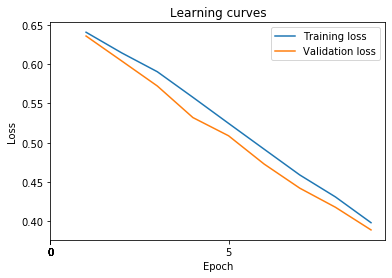

In [14]:
epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
# plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

In [15]:
test_losses = []
evaluate(lr_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.0,
         predicter=torch.nn.Sigmoid(),
         validation=False)

Validation Loss:  0.4066
Validation accuracy: 50.7500%


0.40660735964775085

In [16]:
trn_dl, val_dl, tst_dl = get_dataloaders(classes=['bedrooms'])

('Classes: '
 "['lsun_bedrooms', "
 "'lsun_cars', "
 "'lsun_cats', "
 "'stylegan_bedrooms', "
 "'stylegan_cars', "
 "'stylegan_cats']")
('Indices: '
 "{'lsun_bedrooms': "
 "0, 'lsun_cars': "
 "1, 'lsun_cats': "
 '2, '
 "'stylegan_bedrooms': "
 '3, '
 "'stylegan_cars': "
 '4, '
 "'stylegan_cats': "
 '5}')


In [0]:
s_epoch      = 1
num_epochs   = 10
lr_rate      = 1e-2
load_model   = False
model_name   = 'bedrooms'
path         = '/content/drive/My Drive/CSE253/CSE253_FinalProject/LSUN'

lr_model = LinearRegression(182).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    lr_model.load_state_dict(torch.load(''))

In [18]:
train_losses, valid_losses = train(lr_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   predicter=torch.nn.Sigmoid(),
                                   num_epochs=num_epochs)

Epoch:  1
Training loss: 0.7062


Training Loss:  0.6932
Training accuracy: 50.6667%


Validation Loss:  0.6985
Validation accuracy: 50.7500%
"Best Loss": 0.6984739303588867

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.7079


Training Loss:  0.68
Training accuracy: 55.0833%


Validation Loss:  0.6864
Validation accuracy: 55.7500%
"Best Loss": 0.6864423155784607

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.6779


Training Loss:  0.687
Training accuracy: 52.4167%


Validation Loss:  0.6904
Validation accuracy: 53.0000%
Validation Loss has gone up 1 times.



Epoch:  4
Training loss: 0.6735


Training Loss:  0.6563
Training accuracy: 63.0000%


Validation Loss:  0.6641
Validation accuracy: 59.5000%
"Best Loss": 0.6641241312026978

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.657


Training Loss:  0.6574
Training accuracy: 60.6667%


Validation Loss:  0.6717
Validation accuracy: 59.5000%
Validation Loss has gone up 1 times.



Epoch:  6
Training loss: 0.6493


Training Loss:  0.63
Training accuracy: 65.0833%


Validation Loss:  0.6491
Validation accuracy: 60.0000%
"Best Loss": 0.6490768194198608

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.6262


Training Loss:  0.621
Training accuracy: 68.2500%


Validation Loss:  0.6377
Validation accuracy: 62.2500%
"Best Loss": 0.6376992464065552

Validation Loss has gone up 0 times.



Epoch:  8
Training loss: 0.6153


Training Loss:  0.6095
Training accuracy: 71.0833%


Validation Loss:  0.6309
Validation accuracy: 65.7500%
"Best Loss": 0.630913257598877

Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.6031


Training Loss:  0.6003
Training accuracy: 72.2500%


Validation Loss:  0.6224
Validation accuracy: 65.7500%
"Best Loss": 0.6223613023757935

Validation Loss has gone up 0 times.



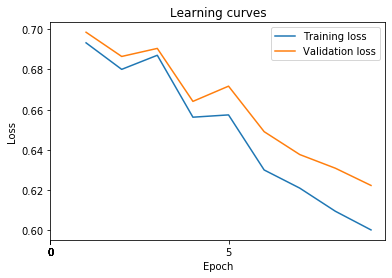

In [19]:
epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
# plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

In [20]:
test_losses = []
evaluate(lr_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.0,
         predicter=torch.nn.Sigmoid(),
         validation=False)

Validation Loss:  0.6056
Validation accuracy: 52.0000%


0.6055551171302795

In [21]:
trn_dl, val_dl, tst_dl = get_dataloaders(classes=['bedrooms', 'cats', 'cars'])

('Classes: '
 "['lsun_bedrooms', "
 "'lsun_cars', "
 "'lsun_cats', "
 "'stylegan_bedrooms', "
 "'stylegan_cars', "
 "'stylegan_cats']")
('Indices: '
 "{'lsun_bedrooms': "
 "0, 'lsun_cars': "
 "1, 'lsun_cats': "
 '2, '
 "'stylegan_bedrooms': "
 '3, '
 "'stylegan_cars': "
 '4, '
 "'stylegan_cats': "
 '5}')


In [0]:
s_epoch      = 1
num_epochs   = 10
lr_rate      = 1e-2
load_model   = False
model_name   = 'all'
path         = '/content/drive/My Drive/CSE253/CSE253_FinalProject/LSUN'

lr_model = LinearRegression(182).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=lr_rate, weight_decay=1e-3, momentum=0.9)

if load_model:
    lr_model.load_state_dict(torch.load(''))

In [25]:
train_losses, valid_losses = train(lr_model, 
                                   optimizer, 
                                   criterion, 
                                   trn_dl, 
                                   val_dl,
                                   model_name,
                                   path,
                                   predicter=torch.nn.Sigmoid(),
                                   num_epochs=num_epochs)

Epoch:  1
Training loss: 0.7042


Training Loss:  0.7118
Training accuracy: 49.4444%


Validation Loss:  0.6981
Validation accuracy: 51.2500%
"Best Loss": 0.6981326341629028

Validation Loss has gone up 0 times.



Epoch:  2
Training loss: 0.698


Training Loss:  0.6609
Training accuracy: 62.7778%


Validation Loss:  0.6607
Validation accuracy: 60.5833%
"Best Loss": 0.6607498725255331

Validation Loss has gone up 0 times.



Epoch:  3
Training loss: 0.6542


Training Loss:  0.6663
Training accuracy: 53.8889%


Validation Loss:  0.674
Validation accuracy: 51.5000%
Validation Loss has gone up 1 times.



Epoch:  4
Training loss: 0.6415


Training Loss:  0.6285
Training accuracy: 68.3056%


Validation Loss:  0.6236
Validation accuracy: 66.4167%
"Best Loss": 0.6235801776250204

Validation Loss has gone up 0 times.



Epoch:  5
Training loss: 0.5963


Training Loss:  0.6003
Training accuracy: 66.9444%


Validation Loss:  0.6157
Validation accuracy: 66.2500%
"Best Loss": 0.6156702240308126

Validation Loss has gone up 0 times.



Epoch:  6
Training loss: 0.5851


Training Loss:  0.5868
Training accuracy: 68.1389%


Validation Loss:  0.5973
Validation accuracy: 66.3333%
"Best Loss": 0.597304900487264

Validation Loss has gone up 0 times.



Epoch:  7
Training loss: 0.5848


Training Loss:  0.6192
Training accuracy: 67.3333%


Validation Loss:  0.6217
Validation accuracy: 65.2500%
Validation Loss has gone up 1 times.



Epoch:  8
Training loss: 0.5922


Training Loss:  0.6172
Training accuracy: 65.8333%


Validation Loss:  0.6096
Validation accuracy: 66.2500%
Validation Loss has gone up 0 times.



Epoch:  9
Training loss: 0.5846


Training Loss:  0.5687
Training accuracy: 69.4444%


Validation Loss:  0.5963
Validation accuracy: 67.1667%
"Best Loss": 0.5962591568628947

Validation Loss has gone up 0 times.



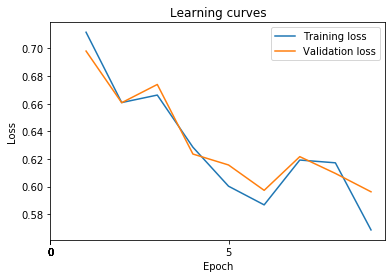

In [26]:
epochs = range(1, len(train_losses) + 1)
epoch_ticks = [i if i % 5 == 0 else 0 for i in epochs]
    
# plt.figure(figsize=(10,6))
plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, valid_losses, label='Validation loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()

In [27]:
test_losses = []
evaluate(lr_model,
         optimizer,
         criterion,
         0,
         tst_dl,
         test_losses,
         "",
         "",
         acc_thresh=0.0,
         predicter=torch.nn.Sigmoid(),
         validation=False)

Validation Loss:  0.591
Validation accuracy: 50.4167%


0.5910460352897644